In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import decode_predictions
from keras.applications.resnet import ResNet50
from keras.models import Model
from pickle import dump

In [ ]:
import pandas as pd

painting_features = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/no_duplicate_painting_features.csv')

In [ ]:
painting_features

,art_style,painting,emotion
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment
...,...,...,...
80026,Northern_Renaissance,pieter-bruegel-the-elder_go-ye-into-the-emmaus,awe
80027,Northern_Renaissance,albrecht-durer_the-small-chariot,awe
80028,Northern_Renaissance,albrecht-durer_sitting-mary-with-child,awe
80029,Northern_Renaissance,jan-van-hemessen_tobias-restores-his-father-s-...,sadness


In [ ]:
painting_features_1000_subset = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/features_1000_subset.csv')

In [ ]:
painting_features_1000_subset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,img0.pkl,0.278422,0.527606,0.021193,1.104790,0.033097,0.149384,...,0.093969,0.058464,2.601777,0.581423,0.006962,0.031829,0.876327,1.170455,0.284816,8
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,img1.pkl,0.106432,0.703795,0.000000,0.007888,0.015668,0.182670,...,0.076510,0.146113,0.001664,2.098103,0.197032,0.151990,0.000000,0.468789,0.256748,2
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,img2.pkl,0.151917,2.557872,0.826035,0.093906,0.009230,0.494370,...,0.159610,0.043264,0.000000,0.699022,0.902976,0.122635,0.026057,0.000000,0.046566,2
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe,img3.pkl,0.063078,1.351175,0.037122,0.448079,0.033715,0.117056,...,0.008081,0.017637,0.506607,1.234004,0.122929,0.000000,0.145163,1.442093,0.533309,2
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment,img4.pkl,2.203687,0.367822,0.976512,0.472500,0.302199,0.152941,...,0.532532,2.082811,0.121080,0.320085,0.154419,0.874045,0.415222,3.152984,0.093512,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Realism,vasily-vereshchagin_two-jews-1884,excitement,img995.pkl,0.017043,2.136100,0.044468,0.118175,0.509737,0.597605,...,0.013687,0.136816,1.167259,0.830424,0.985465,2.046885,0.104100,1.999464,0.612785,5
996,Realism,james-tissot_men-of-the-day-no-4-the-mob-rule-...,amusement,img996.pkl,1.255179,0.000000,1.611124,0.055478,1.011541,0.078781,...,0.412178,0.052310,0.950175,0.748959,0.479490,0.423200,0.713766,0.091844,2.059210,0
997,Impressionism,konstantin-korovin_on-the-square-1912,amusement,img997.pkl,0.000000,4.839285,0.158369,0.084149,0.087437,0.362394,...,0.383353,0.883084,0.047050,0.021787,0.549750,0.062910,0.000000,1.550344,0.015552,0
998,Post_Impressionism,vincent-van-gogh_zouave-sitting-whole-figure-1888,amusement,img998.pkl,0.082224,1.892309,0.065868,0.180113,0.583887,0.154840,...,0.000000,0.021489,2.335641,0.703628,0.880139,0.318111,2.336420,0.000000,0.000000,0


In [ ]:
X = painting_features_1000_subset[painting_features_1000_subset.columns[4:2052]]

In [ ]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2038,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047
0,0.278422,0.527606,0.021193,1.104790,0.033097,0.149384,0.034837,0.009793,0.004354,0.096745,...,0.000000,0.093969,0.058464,2.601777,0.581423,0.006962,0.031829,0.876327,1.170455,0.284816
1,0.106432,0.703795,0.000000,0.007888,0.015668,0.182670,0.417927,0.000000,0.177080,0.000000,...,2.416146,0.076510,0.146113,0.001664,2.098103,0.197032,0.151990,0.000000,0.468789,0.256748
2,0.151917,2.557872,0.826035,0.093906,0.009230,0.494370,0.000000,0.018475,1.458347,0.000000,...,0.090455,0.159610,0.043264,0.000000,0.699022,0.902976,0.122635,0.026057,0.000000,0.046566
3,0.063078,1.351175,0.037122,0.448079,0.033715,0.117056,0.257716,0.666452,0.005462,0.605523,...,0.398210,0.008081,0.017637,0.506607,1.234004,0.122929,0.000000,0.145163,1.442093,0.533309
4,2.203687,0.367822,0.976512,0.472500,0.302199,0.152941,0.060593,0.235251,0.278133,0.278449,...,0.000000,0.532532,2.082811,0.121080,0.320085,0.154419,0.874045,0.415222,3.152984,0.093512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.017043,2.136100,0.044468,0.118175,0.509737,0.597605,0.029375,0.846058,0.397520,0.194609,...,0.013717,0.013687,0.136816,1.167259,0.830424,0.985465,2.046885,0.104100,1.999464,0.612785
996,1.255179,0.000000,1.611124,0.055478,1.011541,0.078781,0.005466,0.416919,0.977389,0.000000,...,0.009497,0.412178,0.052310,0.950175,0.748959,0.479490,0.423200,0.713766,0.091844,2.059210
997,0.000000,4.839285,0.158369,0.084149,0.087437,0.362394,0.795394,0.000000,1.479792,0.000000,...,0.011490,0.383353,0.883084,0.047050,0.021787,0.549750,0.062910,0.000000,1.550344,0.015552
998,0.082224,1.892309,0.065868,0.180113,0.583887,0.154840,0.000000,0.212062,0.319200,0.000000,...,0.003239,0.000000,0.021489,2.335641,0.703628,0.880139,0.318111,2.336420,0.000000,0.000000


In [ ]:
y = painting_features_1000_subset['label']
y

0      8
1      2
2      2
3      2
4      3
      ..
995    5
996    0
997    0
998    0
999    3
Name: label, Length: 1000, dtype: int64

In [ ]:
test_dataset = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/test_dataset_1000.csv')
test_dataset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,Impressionism,joaquã­n-sorolla_pulling-the-boat-1916,amusement,img245.pkl,0.166044,2.197955,1.023054,1.235119,0.000000,0.437646,...,0.363186,0.051580,0.642920,0.352508,1.595905,0.000000,0.041211,0.994471,1.036317,0
1,Realism,thomas-eakins_photograph-1910-19,amusement,img251.pkl,0.456372,0.277109,0.533297,0.089471,1.683744,0.282309,...,0.217372,0.292344,0.782890,0.270933,1.421841,0.000000,0.180432,0.028785,0.048267,0
2,Impressionism,william-merritt-chase_long-island-landscape-af...,amusement,img516.pkl,0.152622,0.032002,0.287799,0.000000,0.004655,0.246127,...,0.471001,0.394759,0.004864,0.832902,0.283388,0.137584,0.056295,0.130895,0.118189,0
3,Northern_Renaissance,hugo-van-der-goes_portinari-triptych-detail-1478,amusement,img486.pkl,1.158494,1.033744,0.078254,0.541306,0.269185,0.114427,...,0.012790,0.012287,3.463528,0.223222,0.148459,1.398204,0.171793,1.836089,0.182203,0
4,Romanticism,orest-kiprensky_portrait-of-the-abbot-skarpell...,amusement,img457.pkl,0.080189,2.324681,0.000000,0.268366,0.129128,0.000000,...,0.000000,0.665128,8.395813,0.651509,0.000000,0.603657,0.213957,0.000000,0.348409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Northern_Renaissance,albrecht-durer_st-paul,something else,img813.pkl,0.092874,0.309151,1.051254,0.442404,0.634865,0.138964,...,0.000000,0.000000,0.787677,0.610717,1.801702,0.132479,0.154987,1.102277,0.116004,8
196,Impressionism,joaquã­n-sorolla_the-beach-at-biarritz-1906,something else,img825.pkl,0.057224,2.081779,0.365008,0.000000,0.096517,0.000000,...,0.001220,0.053152,0.167914,0.203468,0.685938,0.076232,0.231343,0.911162,0.005268,8
197,Realism,vincent-van-gogh_woman-mending-stockings-1881,something else,img47.pkl,0.612480,0.235132,0.000000,0.421110,0.776868,0.000000,...,0.024271,0.005451,5.641107,1.130129,0.880607,0.120828,0.036784,0.159306,0.905283,8
198,Impressionism,konstantin-korovin_paris-cafe-de-la-paix-1906,something else,img290.pkl,0.404573,0.550946,0.000000,0.000000,0.028533,0.318469,...,0.017207,0.203184,0.190020,0.038150,0.462343,0.035897,0.030622,0.339621,0.000000,8


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/train_dataset_1000.csv')
train_dataset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,img0.pkl,0.278422,0.527606,0.021193,1.104790,0.033097,0.149384,...,0.093969,0.058464,2.601777,0.581423,0.006962,0.031829,0.876327,1.170455,0.284816,8
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,img1.pkl,0.106432,0.703795,0.000000,0.007888,0.015668,0.182670,...,0.076510,0.146113,0.001664,2.098103,0.197032,0.151990,0.000000,0.468789,0.256748,2
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,img2.pkl,0.151917,2.557872,0.826035,0.093906,0.009230,0.494370,...,0.159610,0.043264,0.000000,0.699022,0.902976,0.122635,0.026057,0.000000,0.046566,2
3,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment,img4.pkl,2.203687,0.367822,0.976512,0.472500,0.302199,0.152941,...,0.532532,2.082811,0.121080,0.320085,0.154419,0.874045,0.415222,3.152984,0.093512,3
4,Impressionism,willard-metcalf_pond-giverny,contentment,img6.pkl,1.113617,0.472236,0.327334,0.000000,0.328007,0.028909,...,0.034323,0.029568,0.118346,0.058803,1.856311,0.384629,0.251292,0.000000,0.063609,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Impressionism,william-merritt-chase_a-sunny-afternoon-shinne...,awe,img994.pkl,0.666493,0.241977,0.000000,0.000000,0.048801,0.028850,...,0.001526,0.348346,0.000000,0.068498,0.257725,0.165260,0.000000,0.000000,0.000000,2
796,Realism,vasily-vereshchagin_two-jews-1884,excitement,img995.pkl,0.017043,2.136100,0.044468,0.118175,0.509737,0.597605,...,0.013687,0.136816,1.167259,0.830424,0.985465,2.046885,0.104100,1.999464,0.612785,5
797,Impressionism,konstantin-korovin_on-the-square-1912,amusement,img997.pkl,0.000000,4.839285,0.158369,0.084149,0.087437,0.362394,...,0.383353,0.883084,0.047050,0.021787,0.549750,0.062910,0.000000,1.550344,0.015552,0
798,Post_Impressionism,vincent-van-gogh_zouave-sitting-whole-figure-1888,amusement,img998.pkl,0.082224,1.892309,0.065868,0.180113,0.583887,0.154840,...,0.000000,0.021489,2.335641,0.703628,0.880139,0.318111,2.336420,0.000000,0.000000,0


In [ ]:
import numpy as np

In [ ]:
X_train = train_dataset[train_dataset.columns[4:2052]]
y_train = train_dataset['label']

In [ ]:
X_train = np.array(X_train)
y_train = np.array([int(x) for x in y_train])

In [ ]:
X_test = test_dataset[test_dataset.columns[4:2052]]
y_test = test_dataset['label']

In [ ]:
X_test = np.array(X_test)
y_test = np.array([int(x) for x in y_test])

In [ ]:
X_train.shape

(800, 2048)

# **Getting images from drive**

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

In [ ]:
# Get the Image Resolutions

WIKI_IMAGE_ART_DIRECTORY = '/content/drive/MyDrive/College/Sem 6/CV/Project/wikiart'
wikiart_image_heights = []
wikiart_image_widths = []

for i in range(1000):
  current_observation = painting_features_1000_subset.iloc[i]
  image_path = WIKI_IMAGE_ART_DIRECTORY + '/' + current_observation['art_style'] + '/' + current_observation['painting'] + '.jpg'
  image = Image.open(image_path)
  image = np.array(image)
  height, width, channel = image.shape
  wikiart_image_heights.append(height)
  wikiart_image_widths.append(width)

wikiart_image_heights = np.array(wikiart_image_heights)
wikiart_image_widths = np.array(wikiart_image_widths)

In [ ]:
wikiart_image_widths.shape

(1000,)

In [ ]:
max_width = wikiart_image_widths.max()
print("Maximum width: " + str(max_width))

min_width = wikiart_image_widths.min()
print("Minimum width: " + str(min_width))

avg_width = wikiart_image_widths.mean()
print("Average width: " + str(avg_width))

Maximum width: 4288
Minimum width: 262
Average width: 939.697


In [ ]:
max_height = wikiart_image_heights.max()
print("Maximum height: " + str(max_height))

min_height = wikiart_image_heights.min()
print("Minimum height: " + str(min_height))

avg_height = wikiart_image_heights.mean()
print("Average height: " + str(avg_height))

Maximum height: 4841
Minimum height: 211
Average height: 933.592


**Resizing to minimum values**

In [ ]:
WIKI_IMAGE_ART_DIRECTORY = '/content/drive/MyDrive/College/Sem 6/CV/Project/wikiart'

In [ ]:
min_resize_imgs = []
min_resize_labels = []

for i in range(0, 1000):
  current_observation = painting_features_1000_subset.iloc[i]
  image_path = WIKI_IMAGE_ART_DIRECTORY + '/' + current_observation['art_style'] + '/' + current_observation['painting'] + '.jpg'
  image = Image.open(image_path)
  resized_image = image.resize((211, 262))
  resized_image = resized_image.convert('RGB')
  resized_image = img_to_array(resized_image)
  min_resize_imgs.append(resized_image)
  min_resize_labels.append(current_observation['label'])

In [ ]:
X_resized = min_resize_imgs
y_resized = min_resize_labels

In [ ]:
# Train Test Split using Startified Sampling
# 80% - Training Data and 20% - Testing Data
from sklearn.model_selection import train_test_split

X_train_resized, X_test_resized, y_train_resized, y_test_resized = train_test_split(X_resized, y_resized, test_size = 0.2, 
                                                                                    random_state = 1, stratify = y_resized)

In [ ]:
from tensorflow.keras.utils import to_categorical

X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)
y_train_resized = to_categorical(y_train_resized, 9)
y_test_resized = to_categorical(y_test_resized, 9)

In [ ]:
X_train_resized.shape

(800, 262, 211, 3)

## **Function to plot learning curves**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='validation')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='validation')
  pyplot.legend()
  pyplot.show()

# **Classification Report Helper Functions**

In [ ]:
# Function to get a list of values of a performance metric corresponding to each class 
# Possible performance metrics: precision, recall and f1_score

def get_performance_from_classification_report(report, performance_metric):
  performance = []
  for class_id in range(9):
    class_id = str(class_id)
    performance.append(round(report[class_id][performance_metric], 2))
  return performance

In [ ]:
# Function to plot performance bar plot to show classification report graphically

import numpy as np
import matplotlib.pyplot as plt

def draw_performance_plot(precision, recall, f1_score, model_name): 
	barWidth = 0.25
	fig = plt.subplots(figsize =(12, 8))
 
	br1 = np.arange(9)
	br2 = [x + barWidth for x in br1]
	br3 = [x + barWidth for x in br2]

	plt.bar(br1, precision, color ='mediumaquamarine', width = barWidth,
			edgecolor ='grey', label ='Precision')
	plt.bar(br2, recall, color ='palegreen', width = barWidth,
			edgecolor ='grey', label ='Recall')
	plt.bar(br3, f1_score, color ='moccasin', width = barWidth,
			edgecolor ='grey', label ='F1 Score')

	plt.title(f'Performance of {model_name} on Artemis', fontweight ='bold', fontsize = 20)
	plt.ylabel('Performance', fontweight ='bold', fontsize = 15)
	plt.xlabel('Classes', fontweight ='bold', fontsize = 15)
	plt.xticks([r + barWidth for r in range(9)], classes)

	plt.legend()
	plt.show()

# **CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

def make_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu"))

  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_resized = make_CNN_model((262, 211, 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 260, 209, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 258, 207, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 103, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 99, 64)       51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 95, 64)       102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 47, 64)       0         
 2D)                                                    

In [ ]:
CNN_resized.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_resized_5 = CNN_resized.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
20/20 [==============================] - 267s 13s/step - loss: 92.1694 - accuracy: 0.1547 - val_loss: 2.1929 - val_accuracy: 0.1500
Epoch 2/5
20/20 [==============================] - 261s 13s/step - loss: 2.1917 - accuracy: 0.2313 - val_loss: 2.1794 - val_accuracy: 0.3187
Epoch 3/5
20/20 [==============================] - 262s 13s/step - loss: 2.3785 - accuracy: 0.3156 - val_loss: 2.1621 - val_accuracy: 0.3187
Epoch 4/5
20/20 [==============================] - 259s 13s/step - loss: 2.1526 - accuracy: 0.3375 - val_loss: 2.1423 - val_accuracy: 0.3187
Epoch 5/5
20/20 [==============================] - 256s 13s/step - loss: 2.1239 - accuracy: 0.3266 - val_loss: 2.1209 - val_accuracy: 0.3125


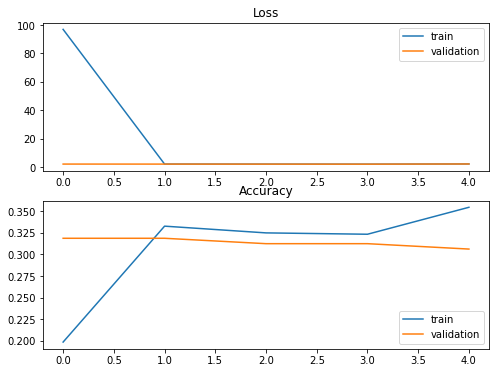

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_resized_5)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_resized.evaluate(X_test_resized, y_test_resized)

7/7 [==============================] - 2s 183ms/step - loss: 2.1240 - accuracy: 0.3300


The test average accuracy is 33%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_resized.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00         1
           2       0.26      0.12      0.16        43
           3       0.35      0.89      0.50        66
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        13
           6       0.25      0.06      0.09        18
           7       0.50      0.04      0.08        23
           8       0.00      0.00      0.00         6

    accuracy                           0.33       200
   macro avg       0.15      0.12      0.09       200
weighted avg       0.25      0.33      0.22       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_1000_subset['emotion'].unique()classes = painting_features_1000_subset['emotion'].unique()s_1000_subset['emotion'].unique()

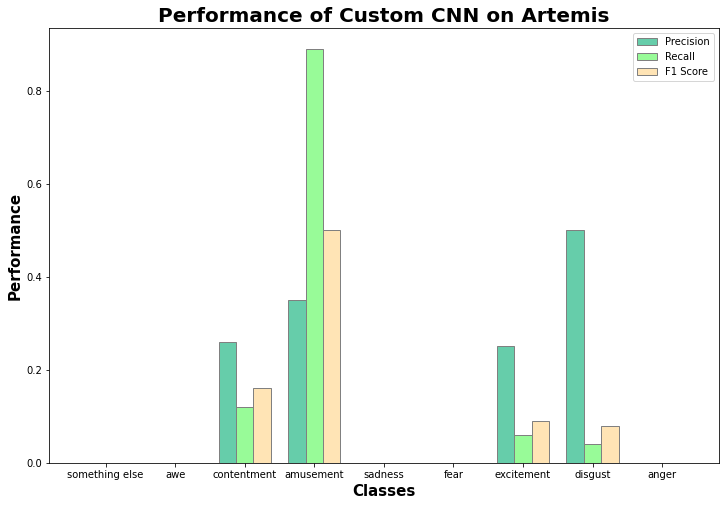

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_CNN_resized_10 = CNN_resized.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
20/20 [==============================] - 6s 286ms/step - loss: 122.9855 - accuracy: 0.1719 - val_loss: 2.2136 - val_accuracy: 0.0875
Epoch 2/10
20/20 [==============================] - 5s 273ms/step - loss: 2.3930 - accuracy: 0.2672 - val_loss: 2.1811 - val_accuracy: 0.3187
Epoch 3/10
20/20 [==============================] - 5s 273ms/step - loss: 2.1319 - accuracy: 0.3000 - val_loss: 2.1689 - val_accuracy: 0.3250
Epoch 4/10
20/20 [==============================] - 5s 272ms/step - loss: 1.9571 - accuracy: 0.3875 - val_loss: 2.2430 - val_accuracy: 0.2688
Epoch 5/10
20/20 [==============================] - 6s 282ms/step - loss: 1.8641 - accuracy: 0.4484 - val_loss: 2.0964 - val_accuracy: 0.3125
Epoch 6/10
20/20 [==============================] - 5s 274ms/step - loss: 1.5064 - accuracy: 0.5203 - val_loss: 2.8222 - val_accuracy: 0.2937
Epoch 7/10
20/20 [==============================] - 6s 283ms/step - loss: 1.1358 - accuracy: 0.6422 - val_loss: 2.9519 - val_accuracy: 0.2937
Epoc

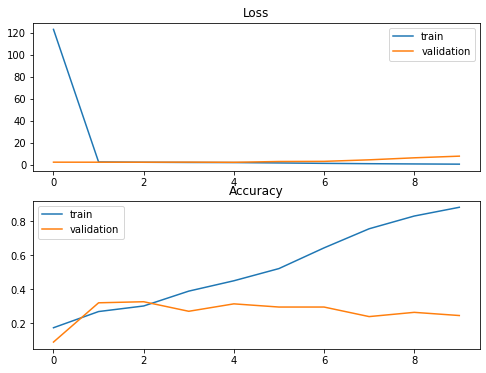

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_resized_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_resized.evaluate(X_test_resized, y_test_resized)

7/7 [==============================] - 1s 97ms/step - loss: 7.7480 - accuracy: 0.1850


The test average accuracy is 18.50%. The accuracy has decreased indicating overfitting.
We will use regularization to improve the CNN architecture.

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_resized.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.09      0.05      0.06        22
           1       0.00      0.00      0.00         1
           2       0.16      0.19      0.17        43
           3       0.29      0.33      0.31        66
           4       0.00      0.00      0.00         8
           5       0.13      0.15      0.14        13
           6       0.00      0.00      0.00        18
           7       0.08      0.09      0.08        23
           8       0.20      0.17      0.18         6

    accuracy                           0.18       200
   macro avg       0.11      0.11      0.11       200
weighted avg       0.16      0.18      0.17       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_1000_subset['emotion'].unique()

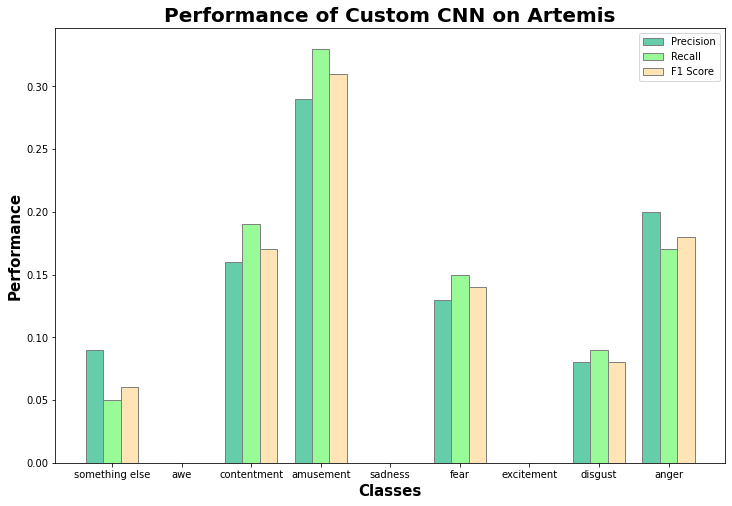

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

# **Regularization**

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def make_regularized_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu", kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                 activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu", kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
  
  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_regularized_1 = make_regularized_CNN_model((262, 211, 3))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 260, 209, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 258, 207, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 129, 103, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 99, 64)       51264     
                                                                 
 conv2d_11 (Conv2D)          (None, 121, 95, 64)       102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 60, 47, 64)       0         
 2D)                                                  

In [ ]:
CNN_regularized_1.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_1 = CNN_regularized_1.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
20/20 [==============================] - 273s 13s/step - loss: 44405.2422 - accuracy: 0.2094 - val_loss: 253.7116 - val_accuracy: 0.3187
Epoch 2/5
20/20 [==============================] - 268s 13s/step - loss: 224.7296 - accuracy: 0.3328 - val_loss: 195.6555 - val_accuracy: 0.3187
Epoch 3/5
20/20 [==============================] - 269s 13s/step - loss: 174.6886 - accuracy: 0.3313 - val_loss: 155.4514 - val_accuracy: 0.3187
Epoch 4/5
20/20 [==============================] - 271s 14s/step - loss: 141.8233 - accuracy: 0.3313 - val_loss: 128.7233 - val_accuracy: 0.3187
Epoch 5/5
20/20 [==============================] - 275s 14s/step - loss: 119.6829 - accuracy: 0.3313 - val_loss: 110.6962 - val_accuracy: 0.3187


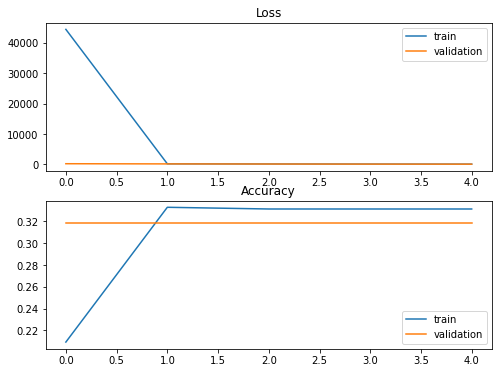

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_1)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_1.evaluate(X_test_resized, y_test_resized)

7/7 [==============================] - 24s 3s/step - loss: 110.6993 - accuracy: 0.3300


The test average accuracy is 33%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_1.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        43
           3       0.33      1.00      0.50        66
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         6

    accuracy                           0.33       200
   macro avg       0.04      0.11      0.06       200
weighted avg       0.11      0.33      0.16       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_1000_subset['emotion'].unique()

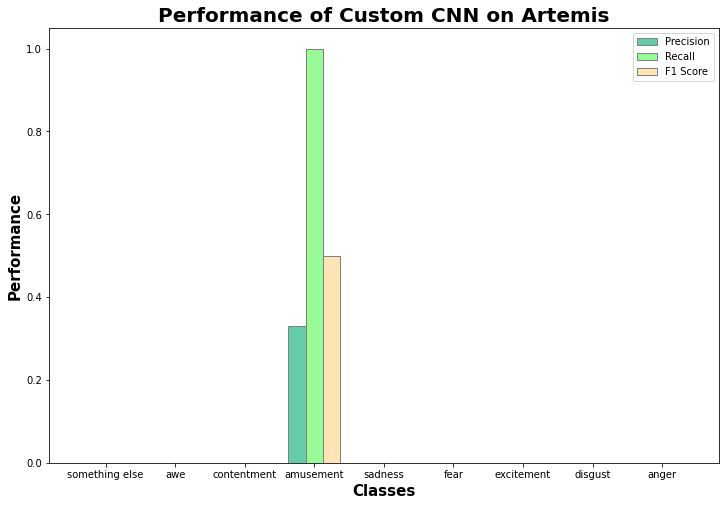

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_2 = CNN_regularized_1.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
20/20 [==============================] - 284s 14s/step - loss: 38977.6094 - accuracy: 0.1828 - val_loss: 299.0686 - val_accuracy: 0.2188
Epoch 2/10
20/20 [==============================] - 277s 14s/step - loss: 276.4783 - accuracy: 0.2156 - val_loss: 250.3988 - val_accuracy: 0.2188
Epoch 3/10
20/20 [==============================] - 277s 14s/step - loss: 228.2773 - accuracy: 0.2172 - val_loss: 206.8171 - val_accuracy: 0.2188
Epoch 4/10
20/20 [==============================] - 284s 14s/step - loss: 190.4459 - accuracy: 0.2172 - val_loss: 174.2065 - val_accuracy: 0.2188
Epoch 5/10
20/20 [==============================] - 283s 14s/step - loss: 162.3691 - accuracy: 0.2172 - val_loss: 150.4262 - val_accuracy: 0.2188
Epoch 6/10
20/20 [==============================] - 280s 14s/step - loss: 140.9496 - accuracy: 0.2172 - val_loss: 131.7311 - val_accuracy: 0.2188
Epoch 7/10
20/20 [==============================] - 285s 14s/step - loss: 124.0778 - accuracy: 0.2172 - val_loss: 116.7198

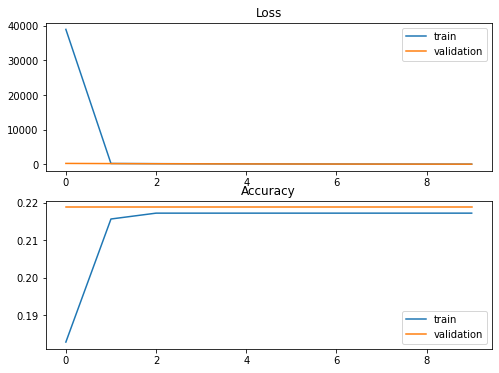

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_2)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_1.evaluate(X_test_resized, y_test_resized)

7/7 [==============================] - 19s 3s/step - loss: 85.4545 - accuracy: 0.2150


The test average accuracy is 33%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_1.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        43
           3       0.33      1.00      0.50        66
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         6

    accuracy                           0.33       200
   macro avg       0.04      0.11      0.06       200
weighted avg       0.11      0.33      0.16       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_1000_subset['emotion'].unique()

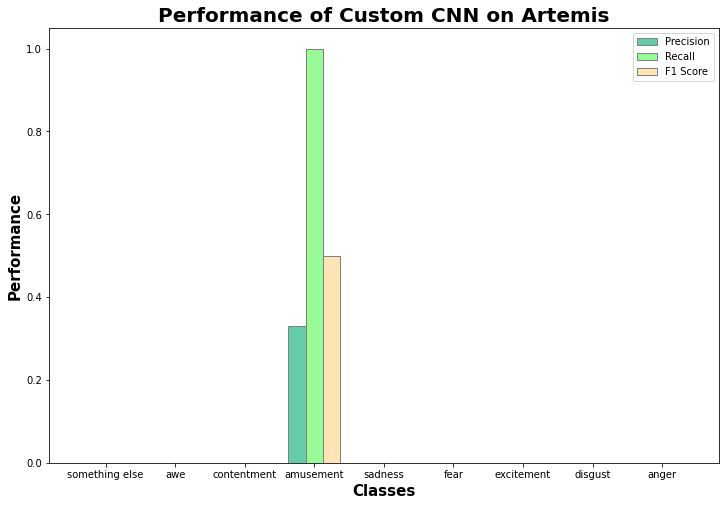

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

# **2000 subset**

In [ ]:
import pandas as pd

painting_features = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/no_duplicate_painting.csv')

In [ ]:
painting_features_2000_subset = painting_features[:2000]

In [ ]:
painting_features_2000_subset

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,The bright colors make a very unique scene for...,7
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,the stroke of blue paint used to outline the h...,7
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe,The golden gloves and white dress stand out an...,7
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment,The pears are just about ripe to eat and enjoy,7
...,...,...,...,...,...
1995,Art_Nouveau_Modern,ivan-bilibin_sketches-of-scenery-for-sadko-by-...,contentment,There is much to this art on architecture. Th...,6
1996,Art_Nouveau_Modern,konstantin-korovin_sketch-for-the-opera-the-ta...,contentment,The town looks welcome while the sky looks cre...,6
1997,Baroque,guido-reni_st-andrew-corsini-in-prayer-1635,amusement,The trio of child heads looking down on the ol...,6
1998,Baroque,peter-paul-rubens_adoration-of-the-shepherds-1,sadness,These people look sad. They also look to be ga...,6


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
painting_features_2000_subset['label']= label_encoder.fit_transform(painting_features_2000_subset['emotion'])

painting_features_2000_subset['label'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([8, 2, 3, 0, 7, 6, 5, 4, 1])

In [ ]:
painting_features_2000_subset.to_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/painting_features_2000_subset.csv')

# **Getting 2000 images from drive**

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

In [ ]:
painting_features_2000_subset = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/painting_features_2000_subset.csv')

In [ ]:
painting_features_2000_subset

,art_style,painting,emotion,label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,8
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,2
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,2
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe,2
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment,3
...,...,...,...,...
1995,Art_Nouveau_Modern,ivan-bilibin_sketches-of-scenery-for-sadko-by-...,contentment,3
1996,Art_Nouveau_Modern,konstantin-korovin_sketch-for-the-opera-the-ta...,contentment,3
1997,Baroque,guido-reni_st-andrew-corsini-in-prayer-1635,amusement,0
1998,Baroque,peter-paul-rubens_adoration-of-the-shepherds-1,sadness,7


In [ ]:
# Get the Image Resolutions

WIKI_IMAGE_ART_DIRECTORY = '/content/drive/MyDrive/College/Sem 6/CV/Project/wikiart'
wikiart_image_heights = []
wikiart_image_widths = []

for i in range(2000):
  current_observation = painting_features_2000_subset.iloc[i]
  image_path = WIKI_IMAGE_ART_DIRECTORY + '/' + current_observation['art_style'] + '/' + current_observation['painting'] + '.jpg'
  image = Image.open(image_path)
  image = np.array(image)
  height, width, channel = image.shape
  wikiart_image_heights.append(height)
  wikiart_image_widths.append(width)

wikiart_image_heights = np.array(wikiart_image_heights)
wikiart_image_widths = np.array(wikiart_image_widths)

In [ ]:
wikiart_image_widths.shape

(2000,)

In [ ]:
max_width = wikiart_image_widths.max()
print("Maximum width: " + str(max_width))

min_width = wikiart_image_widths.min()
print("Minimum width: " + str(min_width))

avg_width = wikiart_image_widths.mean()
print("Average width: " + str(avg_width))

Maximum width: 4734
Minimum width: 201
Average width: 935.677


In [ ]:
max_height = wikiart_image_heights.max()
print("Maximum height: " + str(max_height))

min_height = wikiart_image_heights.min()
print("Minimum height: " + str(min_height))

avg_height = wikiart_image_heights.mean()
print("Average height: " + str(avg_height))

Maximum height: 5236
Minimum height: 211
Average height: 941.0325


**Resizing to minimum values**

In [ ]:
WIKI_IMAGE_ART_DIRECTORY = '/content/drive/MyDrive/College/Sem 6/CV/Project/wikiart'

In [ ]:
min_resize_imgs = []
min_resize_labels = []

for i in range(0, 2000):
  current_observation = painting_features_2000_subset.iloc[i]
  image_path = WIKI_IMAGE_ART_DIRECTORY + '/' + current_observation['art_style'] + '/' + current_observation['painting'] + '.jpg'
  image = Image.open(image_path)
  resized_image = image.resize((211, 201))
  resized_image = resized_image.convert('RGB')
  resized_image = img_to_array(resized_image)
  min_resize_imgs.append(resized_image)
  min_resize_labels.append(current_observation['label'])

In [ ]:
X_resized = min_resize_imgs
y_resized = min_resize_labels

In [ ]:
# Train Test Split using Startified Sampling
# 80% - Training Data and 20% - Testing Data
from sklearn.model_selection import train_test_split

X_train_resized, X_test_resized, y_train_resized, y_test_resized = train_test_split(X_resized, y_resized, test_size = 0.2, 
                                                                                    random_state = 1, stratify = y_resized)

In [ ]:
from tensorflow.keras.utils import to_categorical

X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)
y_train_resized = to_categorical(y_train_resized, 9)
y_test_resized = to_categorical(y_test_resized, 9)

In [ ]:
X_train_resized.shape

(1600, 201, 211, 3)

# **2000 Images CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

def make_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu"))

  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_resized = make_CNN_model((201, 211, 3))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 199, 209, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 197, 207, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 103, 32)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 99, 64)        51264     
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 95, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 47, 64)       0         
 2D)                                                  

In [ ]:
CNN_resized.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_resized_5 = CNN_resized.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
40/40 [==============================] - 26s 284ms/step - loss: 30.3303 - accuracy: 0.2531 - val_loss: 2.1695 - val_accuracy: 0.3406
Epoch 2/5
40/40 [==============================] - 11s 275ms/step - loss: 2.2209 - accuracy: 0.3281 - val_loss: 2.1531 - val_accuracy: 0.2812
Epoch 3/5
40/40 [==============================] - 11s 273ms/step - loss: 2.0512 - accuracy: 0.3328 - val_loss: 2.0475 - val_accuracy: 0.3094
Epoch 4/5
40/40 [==============================] - 11s 281ms/step - loss: 1.8669 - accuracy: 0.4000 - val_loss: 2.1294 - val_accuracy: 0.2937
Epoch 5/5
40/40 [==============================] - 11s 272ms/step - loss: 1.6541 - accuracy: 0.4578 - val_loss: 2.1216 - val_accuracy: 0.3031


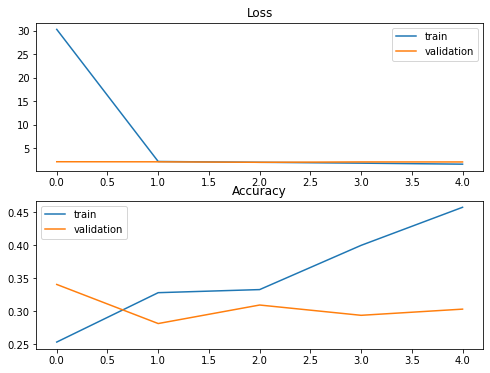

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_resized_5)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_resized.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 2s 176ms/step - loss: 2.3167 - accuracy: 0.3250


The test average accuracy is 32.5%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_resized.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.18      0.05      0.08        38
           1       0.00      0.00      0.00         3
           2       0.25      0.10      0.14        82
           3       0.35      0.86      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.31      0.11      0.16        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.33       400
   macro avg       0.12      0.12      0.10       400
weighted avg       0.22      0.33      0.22       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

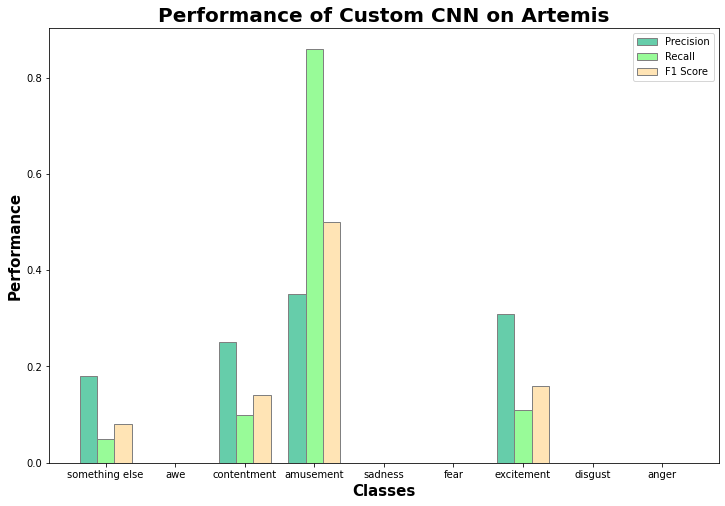

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_CNN_resized_10 = CNN_resized.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 12s 281ms/step - loss: 29.8992 - accuracy: 0.2945 - val_loss: 2.0141 - val_accuracy: 0.3438
Epoch 2/10
40/40 [==============================] - 11s 273ms/step - loss: 2.0629 - accuracy: 0.3422 - val_loss: 2.0890 - val_accuracy: 0.3344
Epoch 3/10
40/40 [==============================] - 11s 272ms/step - loss: 1.8751 - accuracy: 0.3883 - val_loss: 2.1036 - val_accuracy: 0.2969
Epoch 4/10
40/40 [==============================] - 11s 282ms/step - loss: 1.5279 - accuracy: 0.4992 - val_loss: 2.3514 - val_accuracy: 0.2375
Epoch 5/10
40/40 [==============================] - 11s 271ms/step - loss: 1.0443 - accuracy: 0.6578 - val_loss: 3.3776 - val_accuracy: 0.1875
Epoch 6/10
40/40 [==============================] - 11s 272ms/step - loss: 0.6250 - accuracy: 0.8102 - val_loss: 4.7746 - val_accuracy: 0.2281
Epoch 7/10
40/40 [==============================] - 11s 272ms/step - loss: 0.4316 - accuracy: 0.8813 - val_loss: 6.9690 - val_accuracy: 0.200

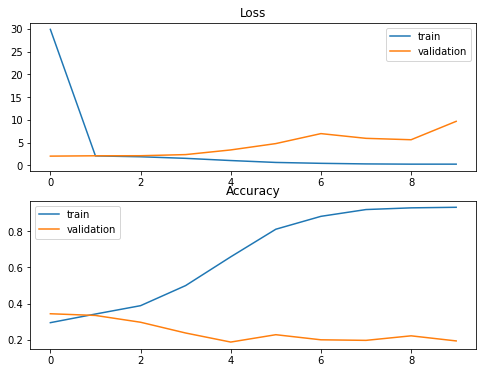

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_resized_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_resized.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 92ms/step - loss: 8.6387 - accuracy: 0.2600


The test average accuracy is 26%. The accuracy has decreased indicating overfitting.
We will use regularization to improve the CNN architecture.

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_resized.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.15      0.32      0.20        38
           1       0.00      0.00      0.00         3
           2       0.25      0.32      0.28        82
           3       0.39      0.33      0.36       135
           4       0.00      0.00      0.00        16
           5       0.07      0.04      0.05        25
           6       0.21      0.11      0.14        37
           7       0.20      0.18      0.19        44
           8       0.15      0.15      0.15        20

    accuracy                           0.25       400
   macro avg       0.16      0.16      0.15       400
weighted avg       0.25      0.25      0.24       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

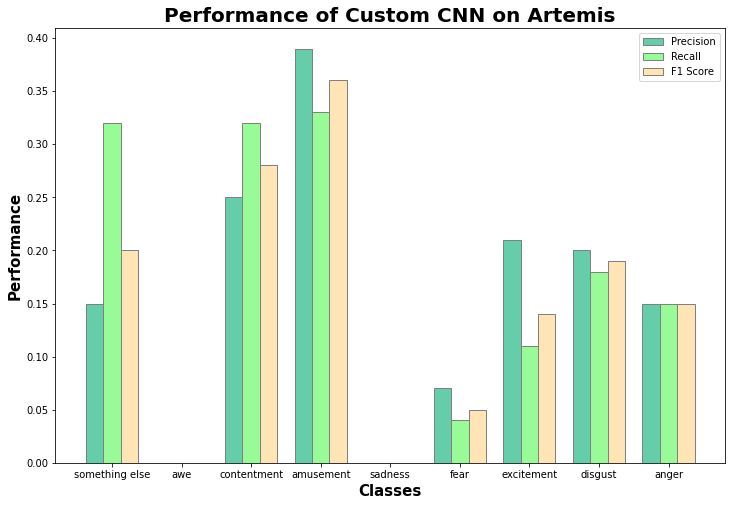

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

# **Regularization**

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def make_regularized_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu", kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                 activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu", kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
  
  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_regularized_1 = make_regularized_CNN_model((201, 211, 3))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 199, 209, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 197, 207, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 103, 32)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 94, 99, 64)        51264     
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 95, 64)        102464    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 47, 64)       0         
 2D)                                                  

In [ ]:
CNN_regularized_1.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_1_5 = CNN_regularized_1.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
40/40 [==============================] - 15s 323ms/step - loss: 30194.2695 - accuracy: 0.3164 - val_loss: 197.1262 - val_accuracy: 0.3438
Epoch 2/5
40/40 [==============================] - 12s 293ms/step - loss: 168.4337 - accuracy: 0.3375 - val_loss: 144.0566 - val_accuracy: 0.3438
Epoch 3/5
40/40 [==============================] - 12s 300ms/step - loss: 128.4259 - accuracy: 0.3375 - val_loss: 114.2272 - val_accuracy: 0.3438
Epoch 4/5
40/40 [==============================] - 12s 292ms/step - loss: 103.5729 - accuracy: 0.3375 - val_loss: 93.8075 - val_accuracy: 0.3438
Epoch 5/5
40/40 [==============================] - 12s 291ms/step - loss: 85.9960 - accuracy: 0.3375 - val_loss: 78.5855 - val_accuracy: 0.3438


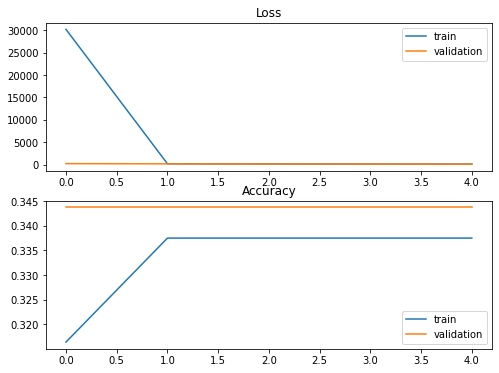

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_1_5)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_1.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 2s 98ms/step - loss: 78.5943 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_1.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

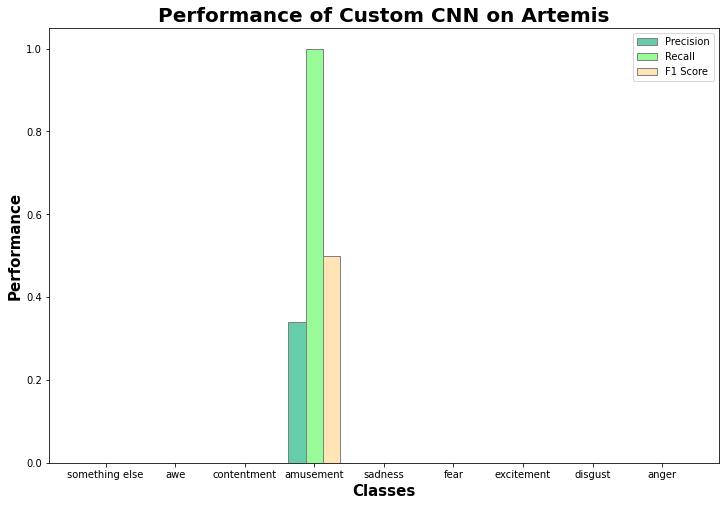

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_CNN_regularized_1_10 = CNN_regularized_1.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 13s 302ms/step - loss: 13567.9580 - accuracy: 0.2586 - val_loss: 191.0158 - val_accuracy: 0.3438
Epoch 2/10
40/40 [==============================] - 12s 294ms/step - loss: 157.2764 - accuracy: 0.3375 - val_loss: 129.6097 - val_accuracy: 0.3438
Epoch 3/10
40/40 [==============================] - 12s 300ms/step - loss: 112.9281 - accuracy: 0.3375 - val_loss: 98.2990 - val_accuracy: 0.3438
Epoch 4/10
40/40 [==============================] - 12s 301ms/step - loss: 88.0735 - accuracy: 0.3375 - val_loss: 78.9230 - val_accuracy: 0.3438
Epoch 5/10
40/40 [==============================] - 12s 291ms/step - loss: 72.4929 - accuracy: 0.3375 - val_loss: 65.7163 - val_accuracy: 0.3438
Epoch 6/10
40/40 [==============================] - 12s 291ms/step - loss: 60.9236 - accuracy: 0.3375 - val_loss: 56.3168 - val_accuracy: 0.3438
Epoch 7/10
40/40 [==============================] - 12s 291ms/step - loss: 52.8835 - accuracy: 0.3375 - val_loss: 49.5058 -

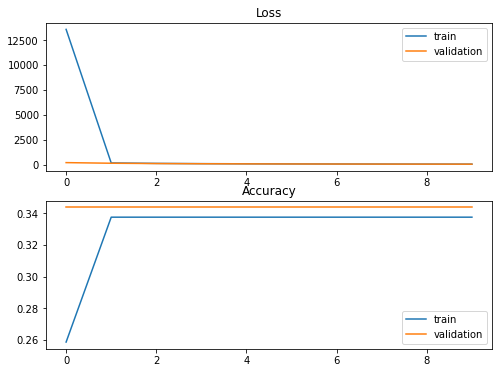

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_1_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_1.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 96ms/step - loss: 36.7883 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_1.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

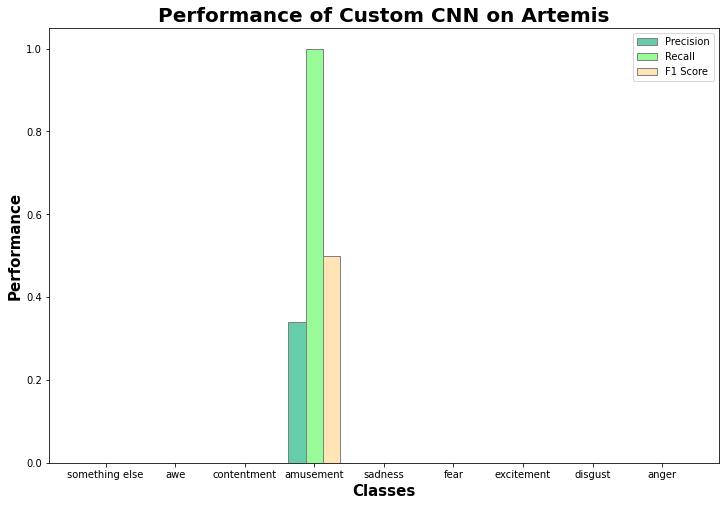

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN')

# **Another regularization approach (2)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

def make_regularized_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu", kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
  
  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_regularized_2 = make_regularized_CNN_model((201, 211, 3))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 199, 209, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 197, 207, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 98, 103, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 94, 99, 64)        51264     
                                                                 
 conv2d_23 (Conv2D)          (None, 90, 95, 64)        102464    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 47, 64)       0         
 g2D)                                                 

In [ ]:
CNN_regularized_2.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_2_5 = CNN_regularized_2.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
40/40 [==============================] - 13s 296ms/step - loss: 504.1994 - accuracy: 0.2516 - val_loss: 159.2293 - val_accuracy: 0.3344
Epoch 2/5
40/40 [==============================] - 11s 280ms/step - loss: 127.1846 - accuracy: 0.3375 - val_loss: 101.8392 - val_accuracy: 0.3438
Epoch 3/5
40/40 [==============================] - 11s 287ms/step - loss: 87.5145 - accuracy: 0.3375 - val_loss: 75.2747 - val_accuracy: 0.3438
Epoch 4/5
40/40 [==============================] - 11s 287ms/step - loss: 67.0932 - accuracy: 0.3375 - val_loss: 59.9537 - val_accuracy: 0.3438
Epoch 5/5
40/40 [==============================] - 11s 287ms/step - loss: 54.8145 - accuracy: 0.3375 - val_loss: 50.1343 - val_accuracy: 0.3438


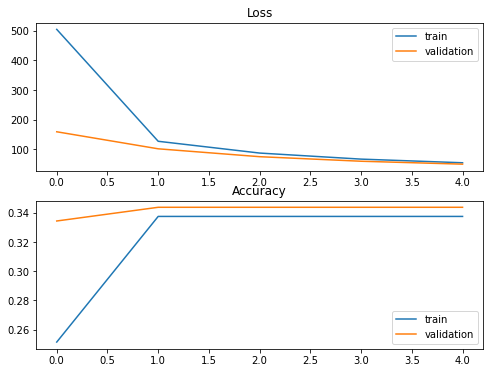

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_2_5)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_2.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 2s 102ms/step - loss: 50.1486 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_2.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

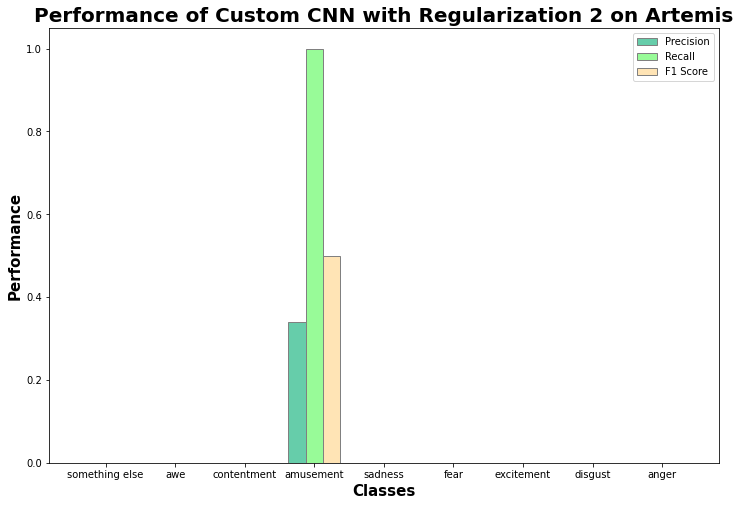

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 2')

# **Regularization Approach 3**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

def make_regularized_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu", kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu"))
  
  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_regularized_3 = make_regularized_CNN_model((201, 211, 3))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 199, 209, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 197, 207, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 98, 103, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 94, 99, 64)        51264     
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 95, 64)        102464    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 47, 64)       0         
 g2D)                                                 

In [ ]:
CNN_regularized_3.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_3_5 = CNN_regularized_3.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
40/40 [==============================] - 13s 293ms/step - loss: 44399.3828 - accuracy: 0.2984 - val_loss: 22.4509 - val_accuracy: 0.3438
Epoch 2/5
40/40 [==============================] - 12s 295ms/step - loss: 21.7483 - accuracy: 0.3375 - val_loss: 21.1397 - val_accuracy: 0.3438
Epoch 3/5
40/40 [==============================] - 12s 296ms/step - loss: 20.7306 - accuracy: 0.3383 - val_loss: 20.3383 - val_accuracy: 0.3438
Epoch 4/5
40/40 [==============================] - 12s 295ms/step - loss: 20.0504 - accuracy: 0.3383 - val_loss: 19.7702 - val_accuracy: 0.3438
Epoch 5/5
40/40 [==============================] - 12s 295ms/step - loss: 19.5458 - accuracy: 0.3391 - val_loss: 19.3056 - val_accuracy: 0.3438


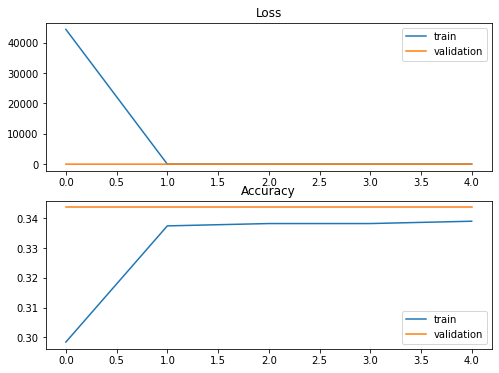

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_3_5)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_3.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 97ms/step - loss: 19.3168 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_3.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

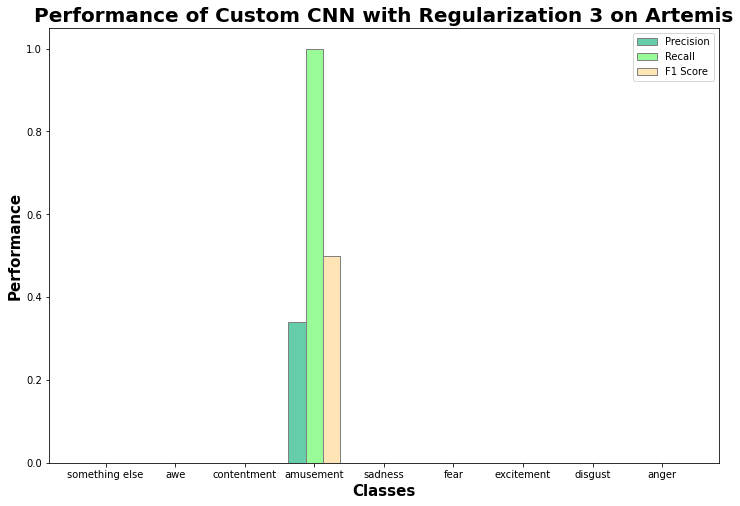

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 3')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_CNN_regularized_3_10 = CNN_regularized_3.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 12s 298ms/step - loss: 19.1196 - accuracy: 0.3391 - val_loss: 18.9062 - val_accuracy: 0.3438
Epoch 2/10
40/40 [==============================] - 11s 287ms/step - loss: 18.7522 - accuracy: 0.3391 - val_loss: 18.6094 - val_accuracy: 0.3438
Epoch 3/10
40/40 [==============================] - 11s 286ms/step - loss: 18.5128 - accuracy: 0.3391 - val_loss: 18.3697 - val_accuracy: 0.3438
Epoch 4/10
40/40 [==============================] - 12s 295ms/step - loss: 18.2427 - accuracy: 0.3391 - val_loss: 18.1156 - val_accuracy: 0.3438
Epoch 5/10
40/40 [==============================] - 11s 286ms/step - loss: 18.0464 - accuracy: 0.3391 - val_loss: 17.9288 - val_accuracy: 0.3438
Epoch 6/10
40/40 [==============================] - 11s 287ms/step - loss: 17.8352 - accuracy: 0.3391 - val_loss: 17.6883 - val_accuracy: 0.3438
Epoch 7/10
40/40 [==============================] - 11s 287ms/step - loss: 17.6056 - accuracy: 0.3391 - val_loss: 17.4782 - val_ac

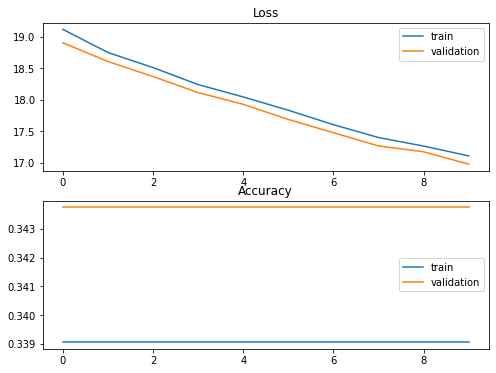

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_3_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_3.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 97ms/step - loss: 17.0083 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_3.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

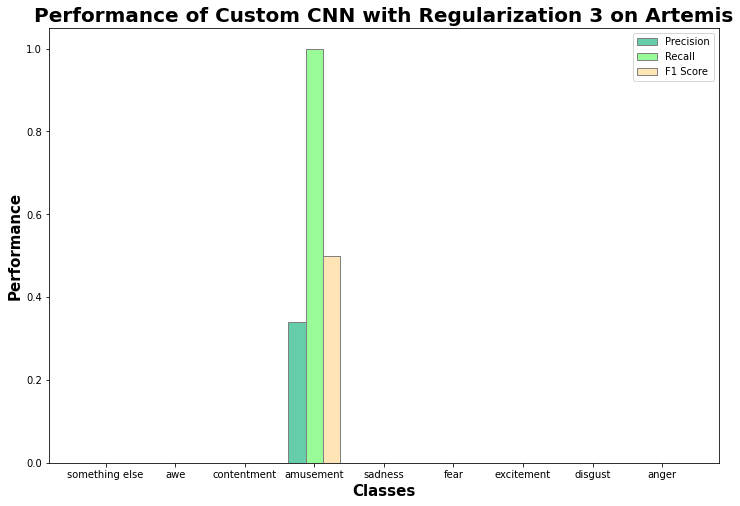

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 3')

## **Dropout Regularization**

### **Part 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

def make_regularized_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Add dropout of 50%
  CNN.add(Dropout(0.5))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  CNN.add(Flatten())

  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu"))
  
  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_regularized_4 = make_regularized_CNN_model((201, 211, 3))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 199, 209, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 197, 207, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 98, 103, 32)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 98, 103, 32)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 94, 99, 64)        51264     
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 95, 64)        102464    
                                                      

In [ ]:
CNN_regularized_4.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_4 = CNN_regularized_4.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
40/40 [==============================] - 12s 288ms/step - loss: 71.3210 - accuracy: 0.2297 - val_loss: 2.1747 - val_accuracy: 0.3438
Epoch 2/5
40/40 [==============================] - 12s 290ms/step - loss: 2.1551 - accuracy: 0.3375 - val_loss: 2.1283 - val_accuracy: 0.3438
Epoch 3/5
40/40 [==============================] - 11s 287ms/step - loss: 2.1105 - accuracy: 0.3398 - val_loss: 2.0783 - val_accuracy: 0.3438
Epoch 4/5
40/40 [==============================] - 11s 277ms/step - loss: 2.0585 - accuracy: 0.3016 - val_loss: 2.0178 - val_accuracy: 0.3438
Epoch 5/5
40/40 [==============================] - 12s 289ms/step - loss: 2.0202 - accuracy: 0.3328 - val_loss: 1.9648 - val_accuracy: 0.3438


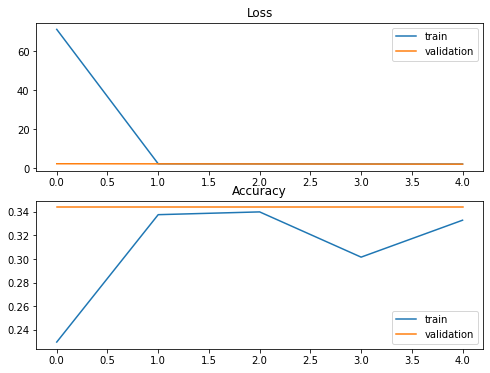

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_4)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_4.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 93ms/step - loss: 1.9793 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_4.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

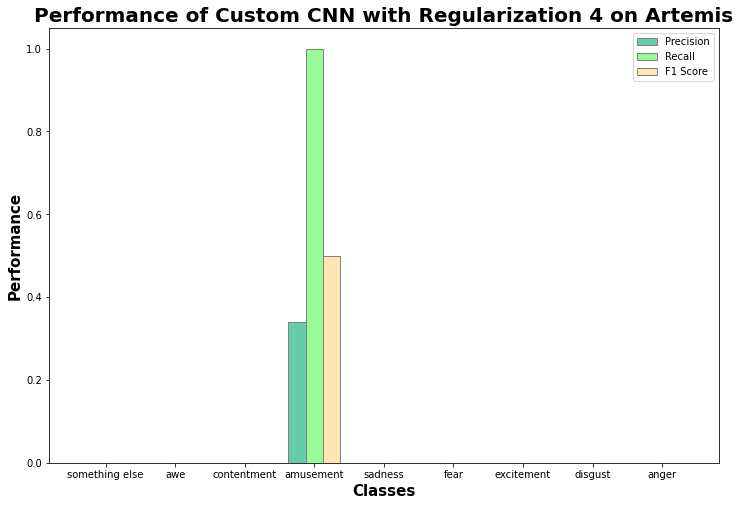

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 4')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_CNN_regularized_4_10 = CNN_regularized_4.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 12s 295ms/step - loss: 83.7334 - accuracy: 0.2805 - val_loss: 2.1725 - val_accuracy: 0.3438
Epoch 2/10
40/40 [==============================] - 11s 278ms/step - loss: 2.1591 - accuracy: 0.3375 - val_loss: 2.1382 - val_accuracy: 0.3438
Epoch 3/10
40/40 [==============================] - 11s 288ms/step - loss: 2.1267 - accuracy: 0.3375 - val_loss: 2.1030 - val_accuracy: 0.3438
Epoch 4/10
40/40 [==============================] - 11s 278ms/step - loss: 2.0944 - accuracy: 0.3375 - val_loss: 2.0675 - val_accuracy: 0.3438
Epoch 5/10
40/40 [==============================] - 11s 288ms/step - loss: 2.0629 - accuracy: 0.3375 - val_loss: 2.0336 - val_accuracy: 0.3438
Epoch 6/10
40/40 [==============================] - 11s 278ms/step - loss: 2.0313 - accuracy: 0.3383 - val_loss: 1.9990 - val_accuracy: 0.3438
Epoch 7/10
40/40 [==============================] - 11s 288ms/step - loss: 2.0128 - accuracy: 0.3398 - val_loss: 1.9611 - val_accuracy: 0.343

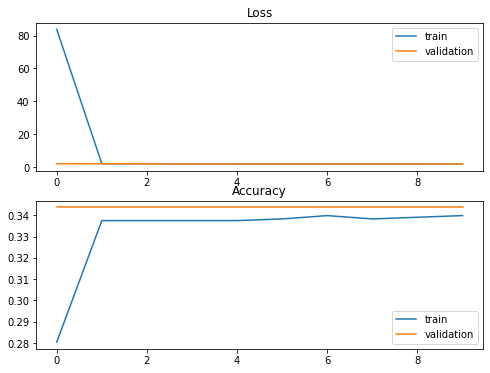

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_4_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_4.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 92ms/step - loss: 1.9183 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_4.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.51       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

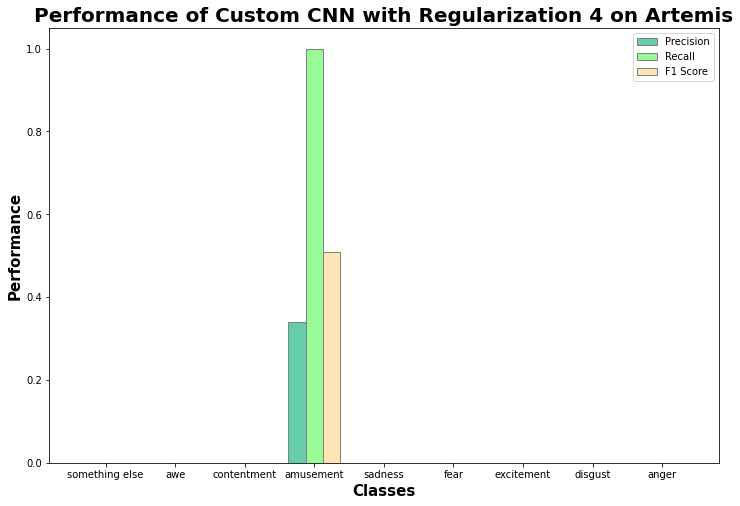

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 4')

### **Part 2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

def make_regularized_CNN_model(input_shape):

  # Create the Convolutional Neural Network Model
  CNN = Sequential()

  # Layer 1 Input layer (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu", input_shape = input_shape))

  # Layer 2 (CONV)
  CNN.add(Conv2D(32, (3,3), activation="relu"))

  # Layer 3 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

  # Add dropout of 50%
  CNN.add(Dropout(0.5))

  # Layer 4 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 5 (CONV)
  CNN.add(Conv2D(64, (5,5), activation="relu"))

  # Layer 6 (POOL)
  CNN.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
  CNN.add(Flatten())

  # Add dropout of 50%
  CNN.add(Dropout(0.5))
  
  # Layer 7 (FC)
  CNN.add(Dense(64, activation="relu"))
  
  # Layer 8 Output Layer (FC)
  CNN.add(Dense(9, activation="sigmoid"))

  CNN.summary()

  return CNN

In [ ]:
CNN_regularized_5 = make_regularized_CNN_model((201, 211, 3))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 199, 209, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 197, 207, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 98, 103, 32)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 98, 103, 32)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 94, 99, 64)        51264     
                                                                 
 conv2d_43 (Conv2D)          (None, 90, 95, 64)        102464    
                                                     

In [ ]:
CNN_regularized_5.compile( optimizer= Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

**5 Epochs**

In [ ]:
# Training the neural network model on the training data with 5 epochs,
# using 20% of the training data for validation
history_CNN_regularized_5 = CNN_regularized_5.fit(X_train_resized, y_train_resized, epochs = 5, validation_split = 0.2)

Epoch 1/5
40/40 [==============================] - 12s 288ms/step - loss: 31.2759 - accuracy: 0.2094 - val_loss: 2.1624 - val_accuracy: 0.3438
Epoch 2/5
40/40 [==============================] - 11s 280ms/step - loss: 2.1424 - accuracy: 0.3375 - val_loss: 2.1140 - val_accuracy: 0.3438
Epoch 3/5
40/40 [==============================] - 11s 279ms/step - loss: 2.0993 - accuracy: 0.3375 - val_loss: 2.0699 - val_accuracy: 0.3438
Epoch 4/5
40/40 [==============================] - 11s 280ms/step - loss: 2.0596 - accuracy: 0.3375 - val_loss: 2.0281 - val_accuracy: 0.3438
Epoch 5/5
40/40 [==============================] - 11s 281ms/step - loss: 2.0222 - accuracy: 0.3375 - val_loss: 1.9872 - val_accuracy: 0.3438


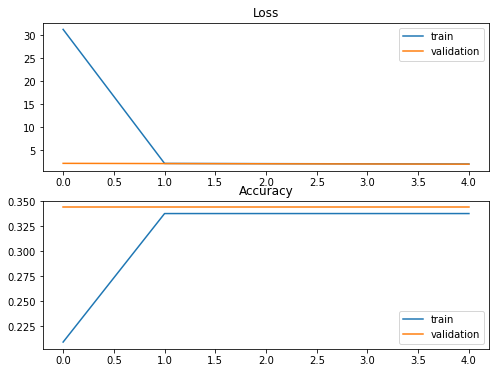

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_5)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_5.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 93ms/step - loss: 2.0017 - accuracy: 0.3375


The test average accuracy is 33%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_5.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

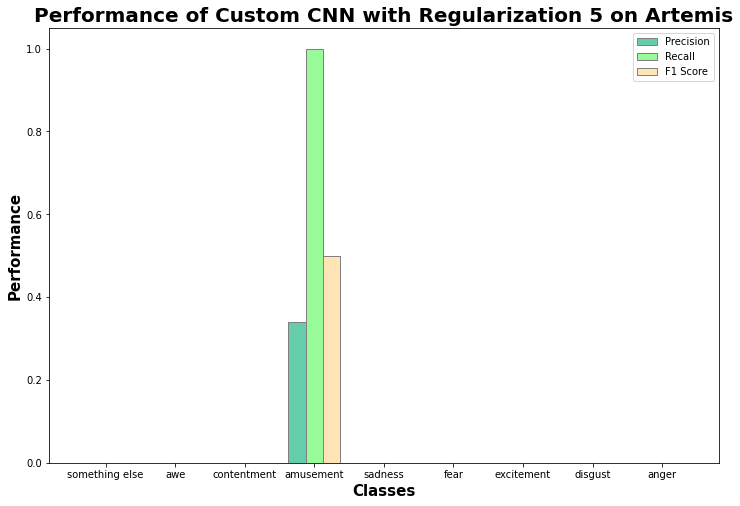

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 5')

**10 Epochs**

In [ ]:
# Training the neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_CNN_regularized_5_10 = CNN_regularized_5.fit(X_train_resized, y_train_resized, epochs = 10, validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 11s 284ms/step - loss: 1.9880 - accuracy: 0.3375 - val_loss: 1.9542 - val_accuracy: 0.3438
Epoch 2/10
40/40 [==============================] - 12s 291ms/step - loss: 1.9611 - accuracy: 0.3375 - val_loss: 1.9271 - val_accuracy: 0.3438
Epoch 3/10
40/40 [==============================] - 11s 287ms/step - loss: 1.9401 - accuracy: 0.3375 - val_loss: 1.9068 - val_accuracy: 0.3438
Epoch 4/10
40/40 [==============================] - 11s 277ms/step - loss: 1.9238 - accuracy: 0.3375 - val_loss: 1.8914 - val_accuracy: 0.3438
Epoch 5/10
40/40 [==============================] - 11s 288ms/step - loss: 1.9115 - accuracy: 0.3375 - val_loss: 1.8781 - val_accuracy: 0.3438
Epoch 6/10
40/40 [==============================] - 11s 279ms/step - loss: 1.9018 - accuracy: 0.3375 - val_loss: 1.8685 - val_accuracy: 0.3438
Epoch 7/10
40/40 [==============================] - 12s 290ms/step - loss: 1.8948 - accuracy: 0.3375 - val_loss: 1.8615 - val_accuracy: 0.3438

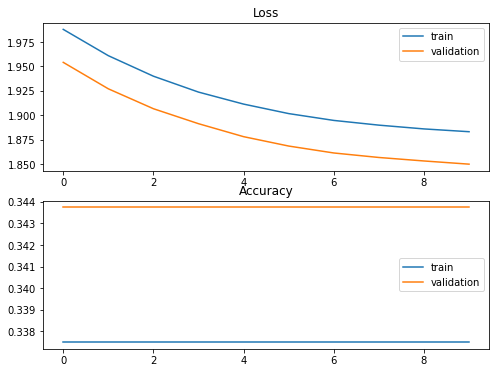

In [ ]:
# Learning curve for the model

summarize_model(history_CNN_regularized_5_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_CNN_resized, testAccuracy_CNN_resized = CNN_regularized_5.evaluate(X_test_resized, y_test_resized)

13/13 [==============================] - 1s 93ms/step - loss: 1.8800 - accuracy: 0.3375


The test average accuracy is 33.75%

In [ ]:
# Using the CNN model to make predictions
y_pred = CNN_regularized_5.predict(X_test_resized)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test_resized,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_CNN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        82
           3       0.34      1.00      0.50       135
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00        20

    accuracy                           0.34       400
   macro avg       0.04      0.11      0.06       400
weighted avg       0.11      0.34      0.17       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_CNN_dict, 'precision')
recall =  get_performance_from_classification_report(report_CNN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_CNN_dict, 'f1-score')

In [ ]:
classes = painting_features_2000_subset['emotion'].unique()

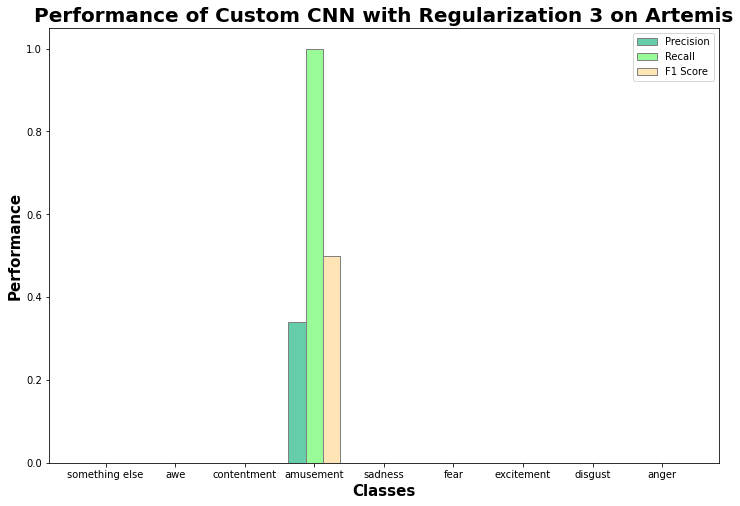

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Custom CNN with Regularization 3')